## Matheus Araujo Pinheiro

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Os métodos de diferenças finitas são técnicas para aproximação numérica de derivadas:

1. **Diferença Finita Progressiva (DFP)**:
   - Fórmula: f'(x) ≈ (f(x + h) - f(x)) / h
   - Erro: O(h), pois ignora informações à esquerda.

In [2]:
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

2. **Diferença Finita Regressiva (DFR)**:
   - Fórmula: f'(x) ≈ (f(x) - f(x - h)) / h
   - Erro: O(h), pois ignora informações à direita.
   

In [3]:
def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

3. **Diferença Finita Central (DFC)**:
   - Fórmula: f'(x) ≈ (f(x + h) - f(x - h)) / (2h)
   - Erro: O(h²), pois utiliza pontos simétricos ao redor de x, sendo mais precisa.

In [4]:
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [5]:
# Funções e derivadas exatas
functions = [
    (lambda x: np.sin(x), lambda x: np.cos(x), 2),
    (lambda x: np.exp(-x), lambda x: -np.exp(-x), 1)
]

hs = [1e-1, 1e-2, 1e-4]

erros = {"Progressiva": [], "Regressiva": [], "Central": []}

print("Aproximações das derivadas e erros absolutos:\n")
for f, df_exact, x in functions:
    print(f"Para u(x) em x = {x}:\n")
    for h in hs:
        df_fd = forward_difference(f, x, h)
        df_bd = backward_difference(f, x, h)
        df_cd = central_difference(f, x, h)
        
        erro_fd = abs(df_fd - df_exact(x))
        erro_bd = abs(df_bd - df_exact(x))
        erro_cd = abs(df_cd - df_exact(x))
        
        erros["Progressiva"].append((h, erro_fd))
        erros["Regressiva"].append((h, erro_bd))
        erros["Central"].append((h, erro_cd))
        
        print(f"h = {h:.1e}")
        print(f"  Diferença Progressiva: {df_fd:.6f}, Erro: {erro_fd:.6e}")
        print(f"  Diferença Regressiva: {df_bd:.6f}, Erro: {erro_bd:.6e}")
        print(f"  Diferença Central: {df_cd:.6f}, Erro: {erro_cd:.6e}\n")

Aproximações das derivadas e erros absolutos:

Para u(x) em x = 2:

h = 1.0e-01
  Diferença Progressiva: -0.460881, Erro: 4.473377e-02
  Diferença Regressiva: -0.370027, Erro: 4.612023e-02
  Diferença Central: -0.415454, Erro: 6.932314e-04

h = 1.0e-02
  Diferença Progressiva: -0.420686, Erro: 4.539514e-03
  Diferença Regressiva: -0.411593, Erro: 4.553385e-03
  Diferença Central: -0.416140, Erro: 6.935746e-06

h = 1.0e-04
  Diferença Progressiva: -0.416192, Erro: 4.546418e-05
  Diferença Regressiva: -0.416101, Erro: 4.546556e-05
  Diferença Central: -0.416147, Erro: 6.928061e-10

Para u(x) em x = 1:

h = 1.0e-01
  Diferença Progressiva: -0.350084, Erro: 1.779587e-02
  Diferença Regressiva: -0.386902, Erro: 1.902274e-02
  Diferença Central: -0.368493, Erro: 6.134390e-04

h = 1.0e-02
  Diferença Progressiva: -0.366046, Erro: 1.833281e-03
  Diferença Regressiva: -0.369725, Erro: 1.845544e-03
  Diferença Central: -0.367886, Erro: 6.131355e-06

h = 1.0e-04
  Diferença Progressiva: -0.367861

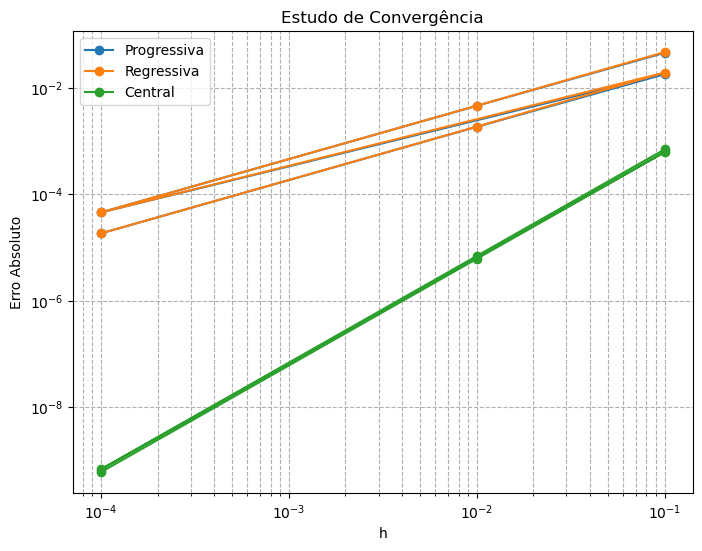

In [6]:
# Estudo de convergência
plt.figure(figsize=(8, 6))
for metodo, valores in erros.items():
    hs_vals, erros_vals = zip(*valores)
    plt.loglog(hs_vals, erros_vals, marker='o', label=metodo)

plt.xlabel("h")
plt.ylabel("Erro Absoluto")
plt.title("Estudo de Convergência")
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

### O estudo de convergência mostra que a diferença central converge mais rapidamente do que as outras duas.

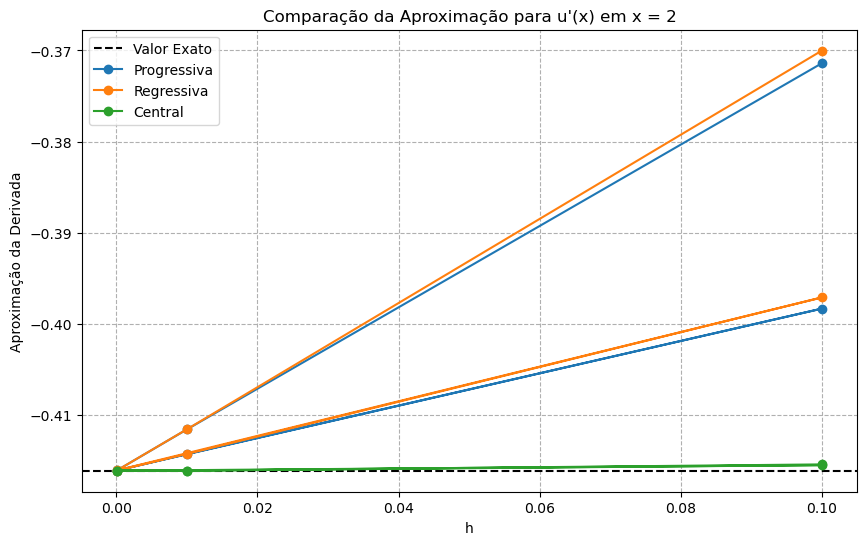

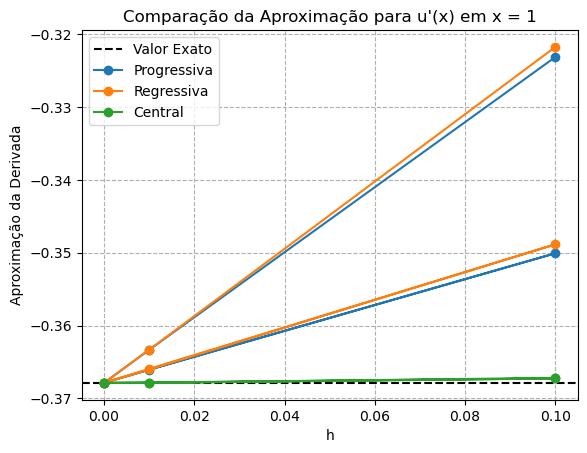

In [7]:
# Gráfico de aproximação por iteração
plt.figure(figsize=(10, 6))
for f, df_exact, x in functions:
    true_value = df_exact(x)
    plt.axhline(true_value, color='black', linestyle='--', label="Valor Exato")
    for metodo, valores in erros.items():
        hs_vals, erros_vals = zip(*valores)
        aproximacoes = [df_exact(x) + erro for erro in erros_vals]
        plt.plot(hs_vals, aproximacoes, marker='o', linestyle='-', label=metodo)
    
    plt.xlabel("h")
    plt.ylabel("Aproximação da Derivada")
    plt.title(f"Comparação da Aproximação para u'(x) em x = {x}")
    plt.legend()
    plt.grid(True, which='both', linestyle='--')
    plt.show()